In [77]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import seaborn as sns
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Classification

In [2]:
ionosphere_data = pd.read_csv('./ionosphere_data.csv', header=None)
ionosphere_data[34] = ionosphere_data[34].apply(lambda x: 1 if x == 'g' else 0)
ionosphere_data

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
5,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,0
6,1,0,0.97588,-0.10602,0.94601,-0.20800,0.92806,-0.28350,0.85996,-0.27342,...,-0.81634,0.13659,-0.82510,0.04606,-0.82395,-0.04262,-0.81318,-0.13832,-0.80975,1
7,0,0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,...,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0
8,1,0,0.96355,-0.07198,1.00000,-0.14333,1.00000,-0.21313,1.00000,-0.36174,...,-0.65440,0.57577,-0.69712,0.25435,-0.63919,0.45114,-0.72779,0.38895,-0.73420,1
9,1,0,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,...,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065,0


In [3]:
ionosphere_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480,0.641026
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337,0.480384
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350,0.000000
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000,1.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Neural network

In [4]:
y = ionosphere_data[34]
X = ionosphere_data.drop(axis=1, columns=[34])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_test = y_test.values.reshape(len(y_test), 1)
y_train = y_train.values.reshape(len(y_train), 1)

In [32]:
class NeuralNetwork:
    def __init__(self, structure, learning_rate = 0.05, batch_size=32):
        self.learning_curve = []
        self.training_stage = []
        self.w0 = np.random.rand(structure[0], structure[1])
        self.w1 = np.random.rand(structure[1], structure[2])
        self.w2 = np.random.rand(structure[2], structure[3])

        self.learning_rate = learning_rate
        self.batch_size = batch_size
        
    def feedforward(self, X):
        self.layer0 = X
        self.layer1 = self.sigmoid(np.dot(self.layer0, self.w0))
        self.layer2 = self.sigmoid(np.dot(self.layer1, self.w1))
        self.layer3 = self.softmax(np.dot(self.layer2, self.w2))
        
        return self.layer3
        
    def backprop(self, X, y_target, y_pred):
        layer3_error = y_pred
        layer3_error[range(len(y_target)), y_target.flatten()] -= 1
        layer3_delta = -layer3_error

        layer2_error = layer3_delta.dot(self.w2.T)
        layer2_delta = layer2_error * self.sigmoid_derivative(self.layer2)
        
        layer1_error = layer2_delta.dot(self.w1.T)
        layer1_delta = layer1_error * self.sigmoid_derivative(self.layer1)

        self.w2 += self.layer2.T.dot(layer3_delta) * self.learning_rate
        self.w1 += self.layer1.T.dot(layer2_delta) * self.learning_rate
        self.w0 += self.layer0.T.dot(layer1_delta) * self.learning_rate
        
    def softmax(self, x):
        exp = np.exp(x)
        return exp / np.sum(exp, axis=1, keepdims=True)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, s):
        return s * (1 - s)
    
    def predict(self, x):
        probs = self.feedforward(x)
        return np.argmax(probs, axis=1)
    
    def train(self, X, y_target, epochs=1000):
        num_train = len(X)
        for i in xrange(epochs):
            for start_idx in range(0, num_train, self.batch_size):
                X_batch = X[start_idx : start_idx+self.batch_size,:]
                y_batch = y_target[start_idx : start_idx+self.batch_size,:]
                
                y_pred = self.feedforward(X_batch)
                self.backprop(X_batch, y_batch, y_pred)
            self.learning_curve.append(self.calculate_loss(X, y_target))
            if i == 10 or i == 390:
                self.training_stage.append(self.layer2)
    
    def calculate_loss(self, X, y):
        probs = self.feedforward(X)
        corect_logprobs = -np.log(probs[np.arange(y.shape[0]), y.flatten()])
        data_loss = np.sum(corect_logprobs)
        return data_loss

## Network architechture
Number of hidden layers and neurons: [35-10-2-1] <br>
Selected features [0,...,34] <br>

In [71]:
NN = NeuralNetwork(structure=[X_train.shape[1], 10, 3, 2], learning_rate=0.05)
NN.train(X_train, y_train, epochs=10000)

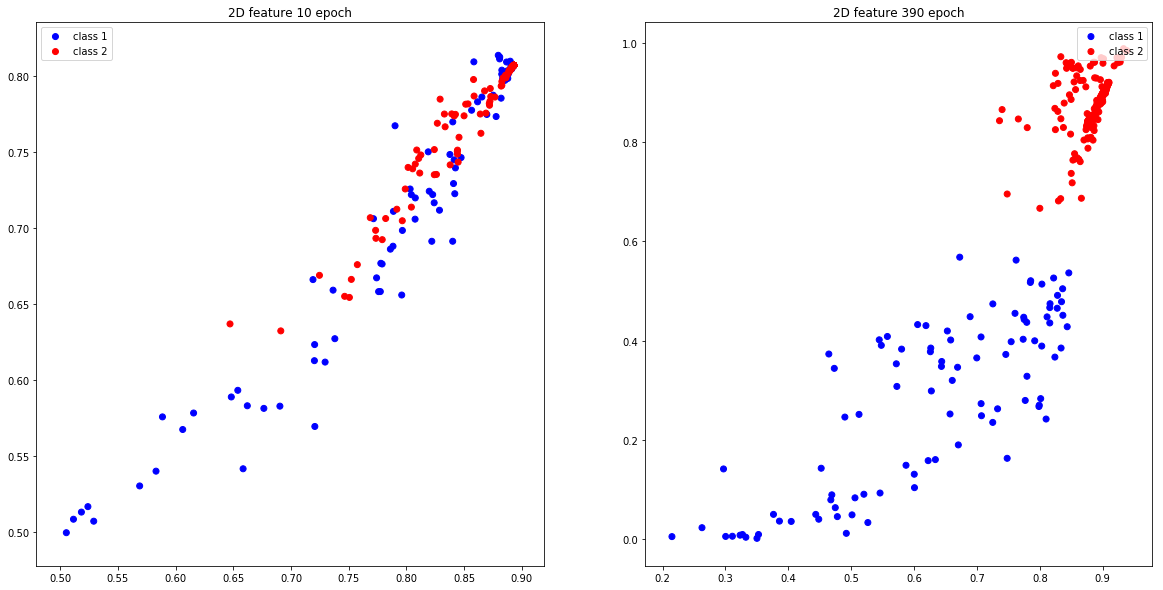

In [72]:
colors = np.array(['b' if x == 0 else 'r' for x in y_train])

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].scatter(NN.training_stage[0][colors == 'b'][:,0], \
               NN.training_stage[0][colors == 'b'][:,1], c=colors[colors=='b'], label=('class 1'))
axs[0].scatter(NN.training_stage[0][colors == 'r'][:,0], \
               NN.training_stage[0][colors == 'r'][:,1], c=colors[colors=='r'], label=('class 2'))
axs[0].legend(loc='upper left')
axs[0].set_title('2D feature 10 epoch')

axs[1].scatter(NN.training_stage[1][colors == 'b'][:,0], \
               NN.training_stage[1][colors == 'b'][:,1], c=colors[colors=='b'], label=('class 1'))
axs[1].scatter(NN.training_stage[1][colors == 'r'][:,0], \
               NN.training_stage[1][colors == 'r'][:,1], c=colors[colors=='r'], label=('class 2'))
axs[1].legend(loc='upper right')
axs[1].set_title('2D feature 390 epoch')

plt.show()

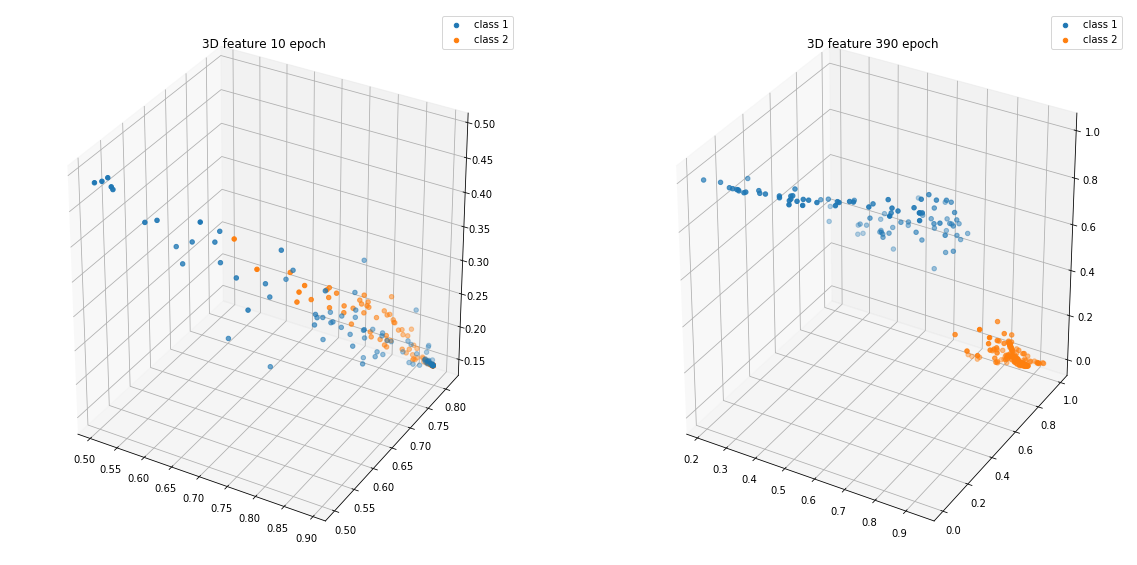

In [89]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(1, 2, 1, projection='3d')

X = NN.training_stage[0][colors == 'b'][:,0]
Y = NN.training_stage[0][colors == 'b'][:,1]
Z = NN.training_stage[0][colors == 'b'][:,2]
ax.set_title('3D feature 10 epoch')
ax.scatter(X, Y, Z, label='class 1')

X = NN.training_stage[0][colors == 'r'][:,0]
Y = NN.training_stage[0][colors == 'r'][:,1]
Z = NN.training_stage[0][colors == 'r'][:,2]
ax.scatter(X, Y, Z, label='class 2')
ax.legend(loc='upper right')



ax = fig.add_subplot(1, 2, 2, projection='3d')

X = NN.training_stage[1][colors == 'b'][:,0]
Y = NN.training_stage[1][colors == 'b'][:,1]
Z = NN.training_stage[1][colors == 'b'][:,2]
ax.scatter(X, Y, Z, label='class 1')

X = NN.training_stage[1][colors == 'r'][:,0]
Y = NN.training_stage[1][colors == 'r'][:,1]
Z = NN.training_stage[1][colors == 'r'][:,2]
ax.scatter(X, Y, Z, label='class 2')
ax.set_title('3D feature 390 epoch')
ax.legend(loc='upper right')

plt.show()